<a href="https://colab.research.google.com/github/tittae/leetcode/blob/main/Airport_Connections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airport Connections

For the purpose of this question, the phrases "airport route" and "airport connection" are used interchangeably.

You're given a list of airports (three-letter codes like `"JFK"`), a list of routes (one-way flights from one airport to another like `["JFK", "SFO"]`), and a starting airport.

Write a function that returns the minimum number of airport connections (one-way flights) that need to be added in order for someone to be able to reach any airport in the list, starting at the starting airport.

Note that routes only allow you to fly in one direction; for instance, the route `["JFK", "SFO"]` only allows you to fly from `"JFK"` to `"SFO"`.

Also note that the connections don't have to be direct; it's okay if an airport can only be reached from the starting airport by stopping at other airports first.

Sample Input

```
airports = [
  "BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
  "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD",
]

routes = [
  ["DSM", "ORD"],
  ["ORD", "BGI"],
  ["BGI", "LGA"],
  ["SIN", "CDG"],
  ["CDG", "SIN"],
  ["CDG", "BUD"],
  ["DEL", "DOH"],
  ["DEL", "CDG"],
  ["TLV", "DEL"],
  ["EWR", "HND"],
  ["HND", "ICN"],
  ["HND", "JFK"],
  ["ICN", "JFK"],
  ["JFK", "LGA"],
  ["EYW", "LHR"],
  ["LHR", "SFO"],
  ["SFO", "SAN"],
  ["SFO", "DSM"],
  ["SAN", "EYW"],
]

startingAirport = "LGA"
```



Sample Output

```
3 // ["LGA", "TLV"], ["LGA", "SFO"], and ["LGA", "EWR"]
```



In [1]:
airports = [
  "BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
  "JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD",
]

routes = [
  ["DSM", "ORD"],
  ["ORD", "BGI"],
  ["BGI", "LGA"],
  ["SIN", "CDG"],
  ["CDG", "SIN"],
  ["CDG", "BUD"],
  ["DEL", "DOH"],
  ["DEL", "CDG"],
  ["TLV", "DEL"],
  ["EWR", "HND"],
  ["HND", "ICN"],
  ["HND", "JFK"],
  ["ICN", "JFK"],
  ["JFK", "LGA"],
  ["EYW", "LHR"],
  ["LHR", "SFO"],
  ["SFO", "SAN"],
  ["SFO", "DSM"],
  ["SAN", "EYW"],
]

startingAirport = "LGA"

In [2]:
# time O(R+A)
# space O(R+A)
# A = no. of airport
# R = no. of route

def airportConnections(airports, routes, startingAirport, report=False):
  # pre-process routes = {start: ['end1', 'end2']}
  routes_hashtable = {}
  reversed_routes_hashtable = {}
  in_degree = {}
  required_connection = 0
  for route in routes:
    if route[0] not in routes_hashtable:
      routes_hashtable[route[0]] = [route[1]]
    else:
      routes_hashtable[route[0]].append(route[1])

    if route[1] not in reversed_routes_hashtable:
      reversed_routes_hashtable[route[1]] = [route[0]]
    else:
      reversed_routes_hashtable[route[1]].append(route[0])

    in_degree[route[1]] = True
  
  visited_airport = {}
  if report: print('airport chain')
  for airport in airports:
    if airport not in in_degree:
      airport_chain, visited_airport, contain_starting_airport = graph_traversal(airport, routes_hashtable, visited_airport, startingAirport)
      if report: print(airport_chain)
      
      if startingAirport != airport_chain[0] and len(airport_chain) > 0:
        required_connection += 1

  if report: print('airport cycle')
  for airport in airports:
    if airport not in visited_airport:
      airport_chain, visited_airport, contain_starting_airport = graph_traversal(airport, routes_hashtable, visited_airport, startingAirport, reversed_routes_hashtable)
      if report: print(airport_chain)
      if not contain_starting_airport and len(airport_chain) > 0:
        if startingAirport not in airport_chain:
          required_connection += 1
        else:
          # check cycle
          cycle = graph_traversal(startingAirport, routes_hashtable, {}, startingAirport, check_cycle = True)
          if not cycle: 
            required_connection += 1

  return required_connection
      

def graph_traversal(airport, routes_hashtable, visited_airport, startingAirport, reversed_routes_hashtable=None, check_cycle = False):
  # init fringe
  fringe = [airport]
  airport_chain = []
  contain_starting_airport = False
  cycle = False

  while True:
    # is fringe empty?
    if fringe == []:
      if check_cycle:
        return cycle
      else:
        return airport_chain, visited_airport, contain_starting_airport

    # remove front
    front = fringe.pop()
    if front in visited_airport: continue
    visited_airport[front] = True
    airport_chain.append(front)
    if front == startingAirport:
      contain_starting_airport = True
    if check_cycle == True:
      for target in routes_hashtable[front]:
        if target in airport_chain:
          cycle = True

    # gen & insert successor
    if front in routes_hashtable:
      successor = routes_hashtable[front]
      fringe = fringe + successor
    
    if reversed_routes_hashtable != None and front in reversed_routes_hashtable:
      successor = reversed_routes_hashtable[front]
      fringe = fringe + successor

In [3]:
print(airportConnections(airports, routes, startingAirport, False))

3


In [4]:
print(airportConnections(airports, routes, startingAirport, True))

airport chain
['EWR', 'HND', 'JFK', 'LGA', 'ICN']
['TLV', 'DEL', 'CDG', 'BUD', 'SIN', 'DOH']
airport cycle
['BGI', 'ORD', 'DSM', 'SFO', 'LHR', 'EYW', 'SAN']
3


## Conceptual Note

The algorithm is basically try to identify diff type of airport chain and count the airport chain for the no. of required connection.

In some case, wel will not count the airport chain as shown in the picture below.

First, we will iterate for chain-types (start with airport with no in degree)

Second, we will iterate all remaining airport to identify cycle-type airport chain. Note: that we have to backward traversal as well to identify whole element in this type. We also have to idenify whether we have starting airport on the leaf of the cycle or not in order to correctly count the required connection.

Time complexity: O(A+R) because we iterate through route to generate graph as dictionary and A for airport traversal and we will not traverse visited airport. However, we will have to traverse to visited airport for the cycle-type airport chain that have starting node to identify wheter our starting node is on cycle or leaf but that will be only O(A) anyway.

Space complexity: O(A + R). A for property of airport like visited, in_degree and R for graph as dictionary.



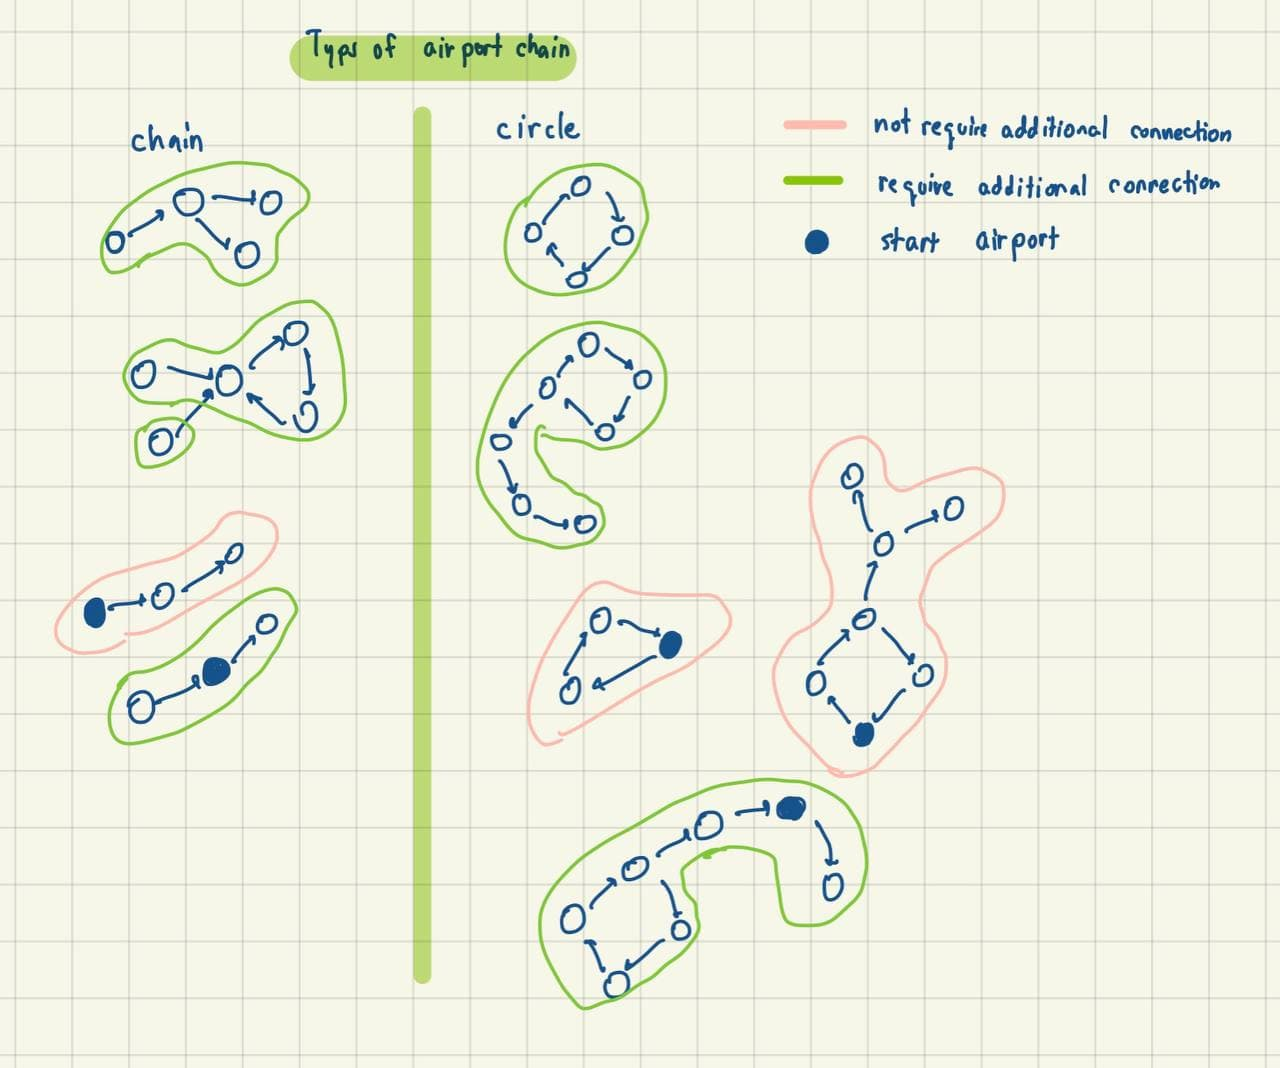